In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("linear_train.csv")
df_train

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
df_test = pd.read_csv("linear_test.csv")
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [4]:
df_train = df_train.dropna()
df_test = df_test.dropna()

In [5]:
df_test

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


In [6]:
x_train, y_train = df_train["x"], df_train["y"]
x_test, y_test = df_test["x"], df_test["y"]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(699,)
(699,)
(300,)
(300,)


In [7]:
x_train, y_train, x_test, y_test = np.array([x_train]).T, np.array(y_train), np.array([x_test]).T, np.array(y_test) 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(699, 1)
(699,)
(300, 1)
(300,)


In [8]:
model = SVR()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

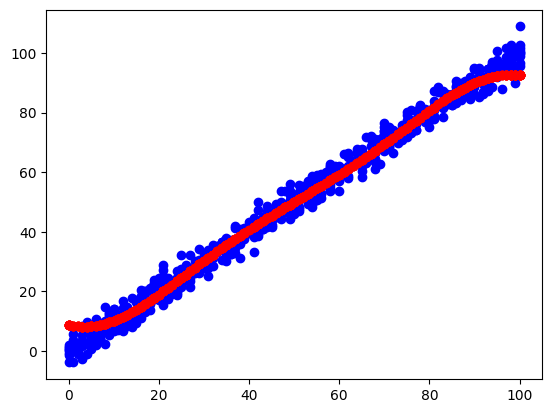

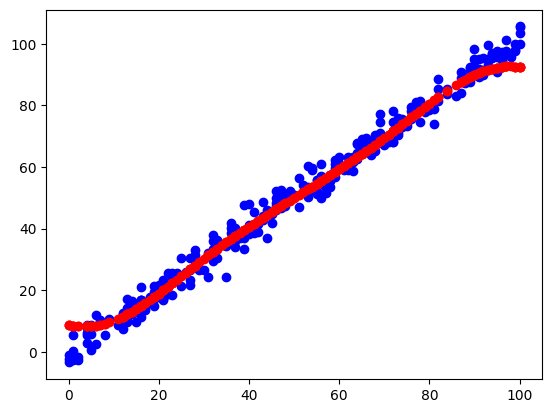

In [9]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color = "blue")
plt.scatter(x_train, y_pred, color = "red")
plt.show()
y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color = "blue")
plt.scatter(x_test, y_pred, color = "red")
plt.show()

In [10]:
def calculate_smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    smape = np.mean(numerator / denominator) * 100

    return smape

smape_score = calculate_smape(y_test, y_pred)
print(f"SMAPE: {smape_score:.2f}%")

SMAPE: 12.87%
